In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
from tensorflow.keras.datasets import cifar10
#10 different classes represent airplanes = 0, cars =1, birds =2, cats = 3, deer = 4, dogs = 5, frogs = 6, horses = 7, ships = 8, and trucks = 9

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 61s 0us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
# notice that it is 50000 images , width is 32 px , height 32 px , 3 colour channel 

In [7]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
x_train[0].shape

(32, 32, 3)

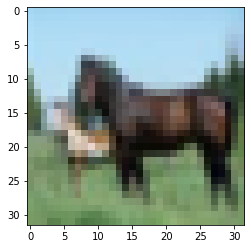

In [12]:
plt.imshow(x_train[12])

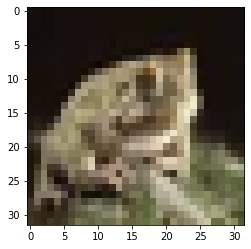

In [13]:
plt.imshow(x_train[10001])

In [14]:
x_train.max()

255

In [15]:
#See here the max value is 255 

In [16]:
x_train = x_train/255

In [17]:
x_test = x_test/255

In [18]:
from tensorflow.keras.utils import to_categorical

In [20]:
y_cat_train = to_categorical(y_train, 10)

In [21]:
y_cat_test = to_categorical(y_test, 10)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [40]:
model = Sequential()

model.add( Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32,32,3), activation = 'relu',))
model.add(MaxPool2D(pool_size = (2,2)))
# See here mnist data set has 28 * 28 = 748 pixcels but in case cifar it is 32*32*3 =3072 fare more so it is better to have one more convoltion layer and pooling layer   
model.add( Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32,32,3), activation = 'relu',))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(255, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [41]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 255)               204255    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [42]:
from tensorflow.keras.callbacks import EarlyStopping 

In [43]:
early_stop = EarlyStopping(monitor= 'val_loss', patience = 2)

In [45]:
model.fit(x_train, y_cat_train, epochs= 15, validation_data=(x_test,y_cat_test), callbacks= [early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 40s 795us/sample - loss: 1.4913 - acc: 0.4600 - val_loss: 1.2683 - val_acc: 0.5440
Epoch 2/15
50000/50000 [==============================] - 39s 784us/sample - loss: 1.1687 - acc: 0.5863 - val_loss: 1.0825 - val_acc: 0.6209
Epoch 3/15
50000/50000 [==============================] - 40s 792us/sample - loss: 1.0180 - acc: 0.6405 - val_loss: 1.0188 - val_acc: 0.6418
Epoch 4/15
50000/50000 [==============================] - 40s 791us/sample - loss: 0.9006 - acc: 0.6852 - val_loss: 0.9876 - val_acc: 0.6539
Epoch 5/15
50000/50000 [==============================] - 39s 787us/sample - loss: 0.8106 - acc: 0.7189 - val_loss: 0.9653 - val_acc: 0.6730
Epoch 6/15
50000/50000 [==============================] - 39s 785us/sample - loss: 0.7295 - acc: 0.7458 - val_loss: 0.9908 - val_acc: 0.6653
Epoch 7/15
50000/50000 [==============================] - 39s 789us/sample - loss: 0.6547 - acc: 0.7711 

In [46]:
metrics = pd.DataFrame(model.history.history)

In [47]:
metrics

,loss,acc,val_loss,val_acc
0,1.491297,0.45996,1.268287,0.5440
1,1.168666,0.58630,1.082519,0.6209
2,1.018011,0.64052,1.018795,0.6418
3,0.900623,0.68520,0.987614,0.6539
4,0.810562,0.71888,0.965314,0.6730
5,0.729542,0.74582,0.990763,0.6653
6,0.654727,0.77106,1.010278,0.6676


In [48]:
metrics.columns

Index(['loss', 'acc', 'val_loss', 'val_acc'], dtype='object')

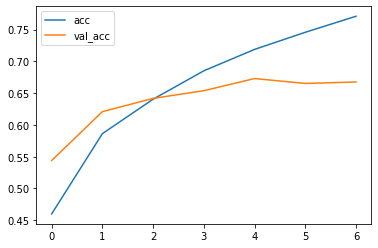

In [49]:
metrics[['acc', 'val_acc']].plot()

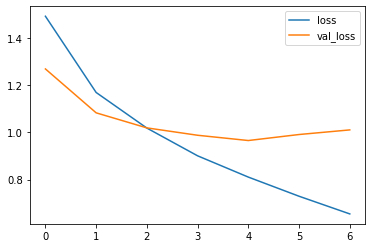

In [50]:
metrics[['loss', 'val_loss']].plot()

In [51]:
from sklearn.metrics  import classification_report, confusion_matrix

In [53]:
predictions  = model.predict_classes(x_test)

In [55]:
print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.69      0.73      1000
           1       0.81      0.78      0.79      1000
           2       0.50      0.68      0.58      1000
           3       0.45      0.54      0.49      1000
           4       0.69      0.50      0.58      1000
           5       0.53      0.56      0.55      1000
           6       0.69      0.82      0.75      1000
           7       0.83      0.61      0.70      1000
           8       0.85      0.73      0.79      1000
           9       0.78      0.75      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.69      0.67      0.67     10000
weighted avg       0.69      0.67      0.67     10000



In [56]:
#See avearage accurecy 67% category 3 is have loavest accurecy 49 % and 1 and 2 got highest accurecy  

In [57]:
import seaborn as sns 

/Users/Prajeesh/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


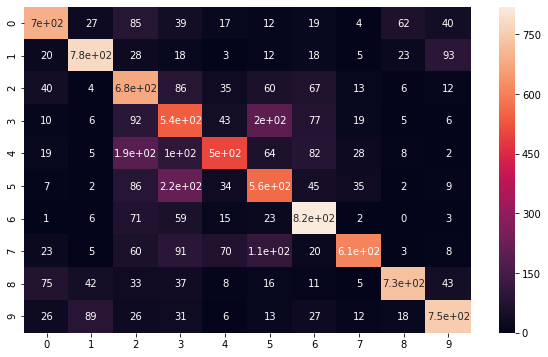

In [59]:
plt.figure(figsize = (10,6)) 
sns.heatmap(confusion_matrix(y_test, predictions), annot= True)

In [100]:
# there is confussion between category 5 ( dog) and 3 (cat) and 4(deer)and 2( bird)

In [107]:
from PIL import Image


In [112]:

image_cat = Image.open('cat1.jpg')
image_color =np.asarray(image_cat.getdata()).reshape((1,32, 32, 3))

In [113]:
model.predict_classes(image_color)

array([3])

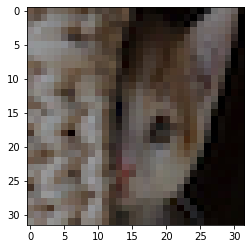

In [114]:
plt.imshow(image_cat)

In [115]:
image_air = Image.open('air1.jpg')
image_air_color =np.asarray(image_air.getdata()).reshape((1,32, 32, 3))

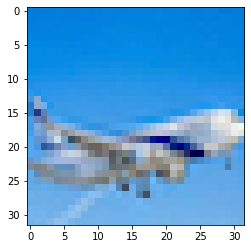

In [116]:
plt.imshow(image_air)

In [117]:
model.predict_classes(image_air_color)

array([0])

In [118]:
image_car = Image.open('car1.jpg')
image_car_color =np.asarray(image_car.getdata()).reshape((1,32, 32, 3))

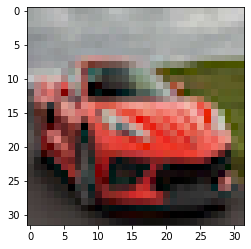

In [119]:
plt.imshow(image_car)

In [120]:
model.predict_classes(image_car_color)

array([1])

In [124]:
image_air1 = Image.open('air2.jpg')
image_air1_color =np.asarray(image_air1.getdata()).reshape((1,32, 32, 3))

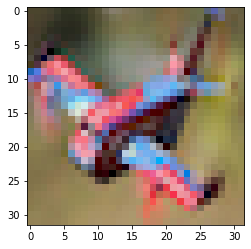

In [125]:
plt.imshow(image_air1)

In [126]:
model.predict_classes(image_air1_color)

array([0])

In [129]:
image_dog = Image.open('dog2.jpg')
image_dog_color =np.asarray(image_dog.getdata()).reshape((1,32, 32, 3))

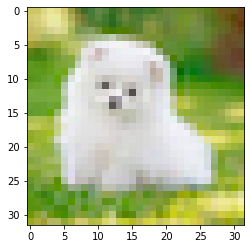

In [130]:
plt.imshow(image_dog)

In [131]:
model.predict_classes(image_dog_color)

array([5])